In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [53]:
b_data = pd.read_csv("Bs.csv", header=None)
p_data = pd.read_csv("Ps.csv", header=None)

In [54]:
b_data['isB'] = 1
b_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,isB
0,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10,1
1,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7,1
2,3,3,3,4,3,7,7,5,5,7,6,6,5,8,5,10,1
3,5,9,7,7,7,8,8,3,6,10,5,6,3,7,6,8,1
4,4,2,5,4,4,7,7,5,6,7,6,6,2,8,7,10,1


In [55]:
p_data['isB'] = 0
p_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,isB
0,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8,0
1,8,14,7,8,4,5,10,6,3,12,5,4,4,10,4,8,0
2,6,10,8,8,7,8,5,7,5,7,6,6,3,9,8,9,0
3,7,11,10,8,6,6,11,3,6,13,6,3,0,10,3,8,0
4,6,10,6,6,4,7,10,5,2,11,5,4,4,11,5,7,0


In [56]:
merged_data = p_data.append(b_data,ignore_index=True)

In [57]:
merged_data.shape

(1569, 17)

In [58]:
merged_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,isB
0,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8,0
1,8,14,7,8,4,5,10,6,3,12,5,4,4,10,4,8,0
2,6,10,8,8,7,8,5,7,5,7,6,6,3,9,8,9,0
3,7,11,10,8,6,6,11,3,6,13,6,3,0,10,3,8,0
4,6,10,6,6,4,7,10,5,2,11,5,4,4,11,5,7,0


In [59]:
X = merged_data.drop('isB', axis=1)
y = merged_data['isB']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [61]:
y_test.value_counts()

0    160
1    154
Name: isB, dtype: int64

In [62]:
y_train.value_counts()

0    643
1    612
Name: isB, dtype: int64

## Radial Basis Function Kernel

In [66]:
#Let's create a validation set
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size = 0.25)

In [69]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gamma_values = [0.0625, 0.125, 0.25, 0.5, 1]

accuracies = {}
df

for C in C_values:
    for gamma in gamma_values:
        # Create a SVC classifier using an RBF kernel
        svc = SVC(kernel='rbf', random_state=0, gamma=gamma, C=C)
        svc.fit(X_train_val, y_train_val)
        y_pred_val = svc.predict(X_test_val)
        accuracy = accuracy_score(y_test_val,y_pred_val)
        accuracies[f"{C}_{gamma}"] = accuracy
        print(f"C: {C}\t Gamma: {gamma}\t Accuracy: {accuracy}")

C: 0.0001	 Gamma: 0.0625	 Accuracy: 0.5159235668789809
C: 0.0001	 Gamma: 0.125	 Accuracy: 0.5159235668789809
C: 0.0001	 Gamma: 0.25	 Accuracy: 0.5159235668789809
C: 0.0001	 Gamma: 0.5	 Accuracy: 0.5159235668789809
C: 0.0001	 Gamma: 1	 Accuracy: 0.5159235668789809
C: 0.001	 Gamma: 0.0625	 Accuracy: 0.5159235668789809
C: 0.001	 Gamma: 0.125	 Accuracy: 0.5159235668789809
C: 0.001	 Gamma: 0.25	 Accuracy: 0.5159235668789809
C: 0.001	 Gamma: 0.5	 Accuracy: 0.5159235668789809
C: 0.001	 Gamma: 1	 Accuracy: 0.5159235668789809
C: 0.01	 Gamma: 0.0625	 Accuracy: 0.5159235668789809
C: 0.01	 Gamma: 0.125	 Accuracy: 0.5159235668789809
C: 0.01	 Gamma: 0.25	 Accuracy: 0.5159235668789809
C: 0.01	 Gamma: 0.5	 Accuracy: 0.5159235668789809
C: 0.01	 Gamma: 1	 Accuracy: 0.5159235668789809
C: 0.1	 Gamma: 0.0625	 Accuracy: 0.9936305732484076
C: 0.1	 Gamma: 0.125	 Accuracy: 0.945859872611465
C: 0.1	 Gamma: 0.25	 Accuracy: 0.6496815286624203
C: 0.1	 Gamma: 0.5	 Accuracy: 0.5159235668789809
C: 0.1	 Gamma: 1	 Accu

In [74]:
data = [[key.split("_")[0], key.split("_")[1], accuracies[key]] for key in accuracies.keys()] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['C', 'gamma', 'accuracy']) 

In [75]:
df

,C,gamma,accuracy
0,0.0001,0.0625,0.515924
1,0.0001,0.125,0.515924
2,0.0001,0.25,0.515924
3,0.0001,0.5,0.515924
4,0.0001,1,0.515924
5,0.001,0.0625,0.515924
6,0.001,0.125,0.515924
7,0.001,0.25,0.515924
8,0.001,0.5,0.515924
9,0.001,1,0.515924


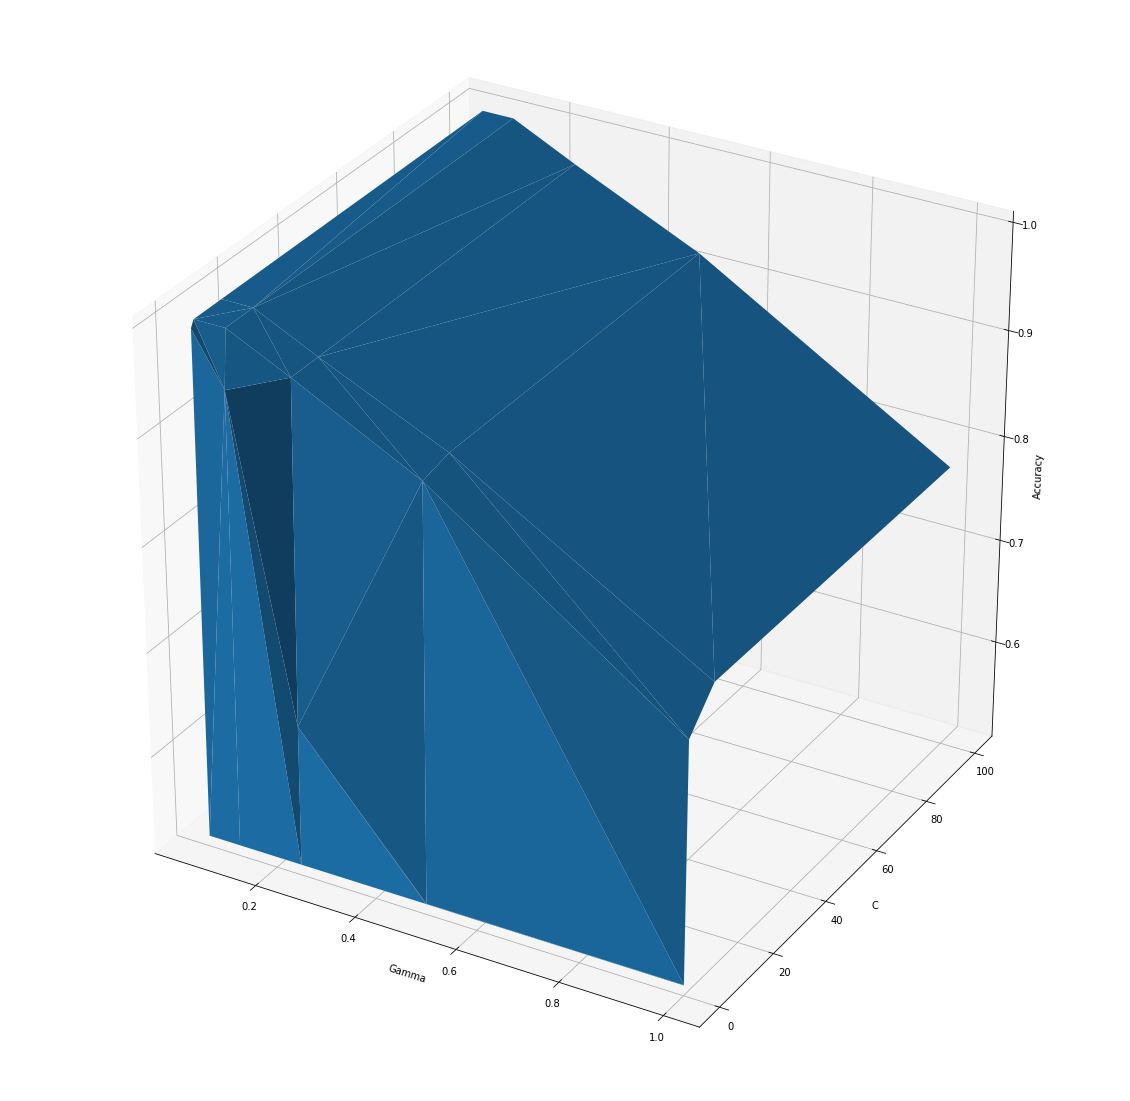

In [109]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df['gamma'], df['C'], df['accuracy'])

ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_zlabel('Accuracy')

plt.show()

In [136]:
def getBestAcc(df_acc):
    bests = []
    max = 0
    for row in df_acc.itertuples(index=True, name='Pandas'):
        if getattr(row, "accuracy") > max:
            bests = []
            toApp = [getattr(row, "C"), getattr(row, "gamma"), getattr(row, "accuracy")]
            bests.append(toApp)
            max = getattr(row, "accuracy")
        elif getattr(row, "accuracy") == max:
            toApp = [getattr(row, "C"), getattr(row, "gamma"), getattr(row, "accuracy")]
            bests.append(toApp)
    return bests

In [137]:
getBestAcc(df)

[['1', '0.0625', 1.0],
 ['1', '0.125', 1.0],
 ['10', '0.0625', 1.0],
 ['10', '0.125', 1.0],
 ['100', '0.0625', 1.0],
 ['100', '0.125', 1.0]]

###  So, After tuning, we have several optimum C and gamma values
```
C: 1,   Gamma: 0.0625, Accuracy: 1.0
C: 1,   Gamma: 0.125,  Accuracy: 1.0
C: 10,  Gamma: 0.0625, Accuracy: 1.0
C: 10,  Gamma: 0.125,  Accuracy: 1.0
C: 100, Gamma: 0.0625, Accuracy: 1.0
C: 100, Gamma: 0.125,  Accuracy: 1.0

So Let's pick one of them and test our data
Picked:
C: 10,  Gamma: 0.0625
```

In [139]:
gamma = 0.0625
C = 10
# Create a SVC classifier using an RBF kernel
svc = SVC(kernel='rbf', random_state=0, gamma=gamma, C=C)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracies[f"{C}_{gamma}"] = accuracy
print(f"C: {C}\t Gamma: {gamma}\t Accuracy: {accuracy}")

C: 10	 Gamma: 0.0625	 Accuracy: 1.0


## Resulting Accuracy: 1.0

In [140]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [148]:
np.savetxt("Decisions_RBF_Kernel.txt", y_pred, fmt='%d')